# Decision Trees with Titanic Kaggle Dataset

In [1]:
import pandas
data = pandas.read_csv("titanic.csv")
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
y, X = data['survived'], data[['pclass','sex','age','sibsp', 'fare']].fillna(0)
X['sex'].replace(['female','male'],[0,1],inplace=True)
X['age'] = X['age'].astype(int)
y.head(), X.head()

(0    1
 1    1
 2    0
 3    0
 4    0
 Name: survived, dtype: int64,    pclass  sex  age  sibsp      fare
 0       1    0   29      0  211.3375
 1       1    1    0      1  151.5500
 2       1    0    2      1  151.5500
 3       1    1   30      1  151.5500
 4       1    0   25      1  151.5500)

In [3]:
X.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'fare'], dtype='object')

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)
len(X_train), len(y_train), len(X_test), len(y_test)

(1047, 1047, 262, 262)

In [5]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.80916030534351147

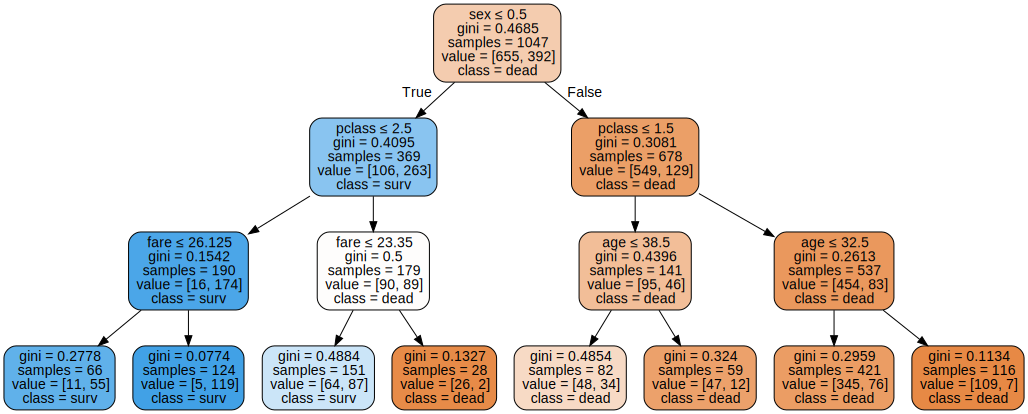

In [6]:
import os
from tempfile import mkstemp
import subprocess

from sklearn.tree.export import export_graphviz

def convert_decision_tree_to_ipython_image(clf, feature_names=None, class_names=None,
                                           image_filename=None, tmp_dir=None):
    dot_filename = mkstemp(suffix='.dot', dir=tmp_dir)[1]
    with open(dot_filename, "w") as out_file:
        export_graphviz(clf, out_file=out_file,
                        feature_names=feature_names,
                        class_names=class_names,
                        filled=True, rounded=True,
                        special_characters=True)

    import graphviz
    from IPython.display import display

    with open(dot_filename) as f:
        dot_graph = f.read()
    display(graphviz.Source(dot_graph))
    os.remove(dot_filename)

convert_decision_tree_to_ipython_image(clf, image_filename='titanic.png', feature_names=X.columns, class_names=["dead", "surv"])

In [7]:
clf.feature_importances_

array([ 0.20633449,  0.69231053,  0.03019166,  0.        ,  0.07116332])

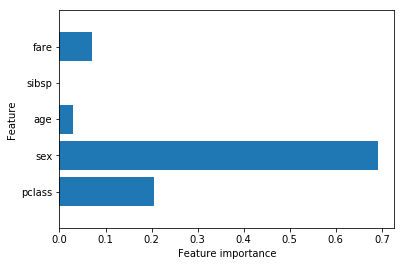

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances(clf):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), clf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances(clf)

In [9]:
from sklearn import ensemble
clf_rf = ensemble.RandomForestClassifier(n_estimators=50, random_state=800)
clf_rf.fit(X_train, y_train)
clf_rf.score(X_test, y_test)

0.81297709923664119

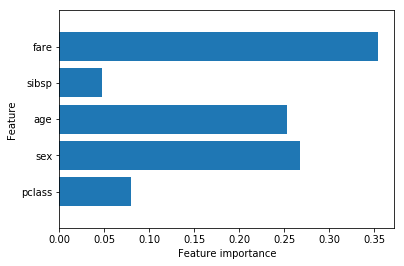

In [10]:
plot_feature_importances(clf_rf)

In [11]:
from sklearn import ensemble
clf_gd = ensemble.GradientBoostingClassifier(random_state=800)
clf_gd.fit(X_train, y_train)
clf_gd.score(X_test, y_test)

0.8282442748091603

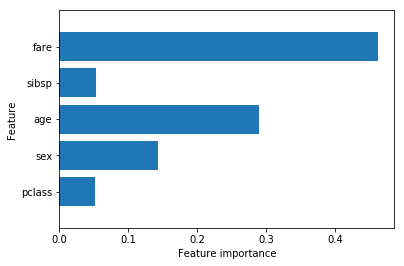

In [12]:
plot_feature_importances(clf_gd)